In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import math
import string
import seaborn as sns
sns.set_style()

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.rc('text.latex', preamble=r'\usepackage{color}')
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': smallfs, 'axes.titlesize':smallfs})
plt.rc('axes', labelsize=smallfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels



# Number agents

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


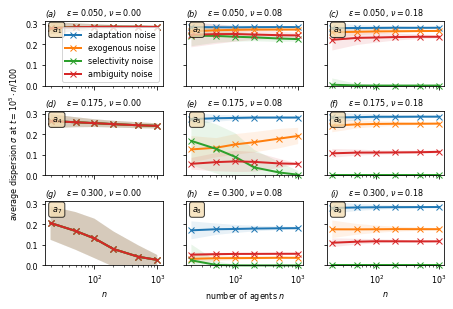

In [2]:
folder = "../../data/ms2_noise-in-OD/SA/"

fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16/2.54, 10.5/2.54))
for noise_type in ["adaptation", "exogenous", "selection", "ambiguity"]:
    data = {}
    ns =  [20,50,100,200,500,1000]
    std = {}
    for n in ns:
        san = xr.open_dataset(f"{folder}model-{noise_type}Noise_SARes_SAn-Tadjusted_n{n}uniformInitial_eps_seeds0-1000.ncdf", engine="netcdf4")
        data[n] = san.sel({"mu":0.5, "t":1e5*n/100}).x.std(dim="id").mean(dim="seed")
        std[n] = san.sel({"mu":0.5, "t":1e5*n/100}).x.std(dim="id").std(dim="seed")
          
    for nnoise, nu, in enumerate(san.nu.values):
        for nbias, bc in enumerate(san.bc.values):
            ax = axs[nbias, nnoise]
            #m = list(np.diag(a.sel({"nu":nu, "bc":bc}).values[:,1:]))
            #m.append(a2k.sel({"nu":nu, "bc":bc, "n":2000, "t":1e5*2000/100}).values)
            #m.append(a5k.sel({"nu":nu, "bc":bc,"n":5000, "t":1e5*5000/100}).values)
            m = np.array([data[n].sel({"nu":nu, "bc":bc}).values for n in ns])
            s=  np.array([std[n].sel({"nu":nu, "bc":bc}).values for n in ns])
            l = ax.fill_between(ns, m-s, m+s, alpha=0.1)
            if noise_type=="selection":
                noise_type="selectivity"
            ax.plot(ns, m, label=f"{noise_type} noise", marker="x", color=l.get_facecolor()[:2], alpha=1, lw=2, clip_on=False)
            ax.set_title(fr"$\epsilon=${bc:.3f}, $\nu=${nu:.2f}", fontsize=smallfs)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.set_xscale("log")
            ax.set_ylim(0,)
            ax.set_clip_on(False)
axs[1,0].set_ylabel(r"average dispersion $\sigma$ at $t=10^5 \cdot n/100$", fontsize=smallfs)
    
axs[2,1].set_xlabel(r"number of agents $n$", fontsize=smallfs)
axs[2,0].set_xlabel(r"$n$", fontsize=smallfs)
axs[2,2].set_xlabel(r"$n$", fontsize=smallfs)

axs[0,0].legend(loc="lower right", fontsize=smallfs)

letter =[r"$\,a_1$", r"$a_2$", r"$a_3$", r"$\,a_4$", r"$a_5$", r"$a_6$", r"$\,a_7$", r"$a_8$", r"$a_9$"]  
for n, ax in enumerate(axs.flatten()):
    ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k", bbox =dict(boxstyle='round', facecolor='wheat', alpha=0.77))

letters = string.ascii_lowercase[:14]
for l, ax in zip(letters, axs.flatten()):
    ax.text(0.1, 1.05, f"({l})", style="italic", color="k", fontsize=smallfs, va="bottom", ha="right", transform=ax.transAxes)
fig.subplots_adjust(hspace=0.4, right=0.97, bottom=0.11, top=0.93, left=0.09)
plt.savefig("figs/sa-n_timeadjusted.png", dpi=600)
plt.savefig("figs/sa-n_timeadjusted.pdf")


# Mu

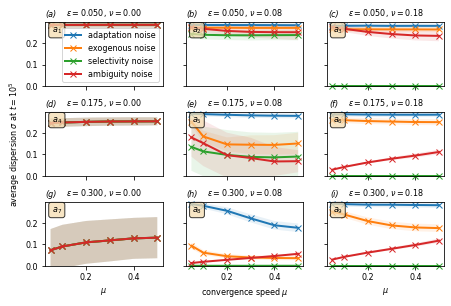

In [3]:
folder = "../../data/ms2_noise-in-OD/SA/"

fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16/2.54, 10.5/2.54))
for noise_type in ["adaptation", "exogenous", "selection", "ambiguity"]:
    data = xr.open_dataset(f"{folder}model-{noise_type}Noise_SARes_SAmu_uniformInitial_eps_seeds0-1000.ncdf", engine="netcdf4")
    mean = data.sel({"t":1e5}).x.std(dim="id").mean(dim="seed")
    std = data.sel({"t":1e5}).x.std(dim="id").std(dim="seed")
          
    for nnoise, nu, in enumerate(data.nu.values):
        for nbias, bc in enumerate(data.bc.values):
            ax = axs[nbias, nnoise]
            m = mean.sel({"nu":nu, "bc":bc}).values 
            s=  std.sel({"nu":nu, "bc":bc}).values
            l = ax.fill_between(mean.mu, m-s, m+s, alpha=0.1)
            if noise_type=="selection":
                noise_type="selectivity"
            ax.plot(mean.mu, m, label=f"{noise_type} noise", marker="x", color=l.get_facecolor()[:2], alpha=1, lw=2, clip_on=False)
            ax.set_title(fr"$\epsilon=${bc:.3f}, $\nu=${nu:.2f}", fontsize=smallfs)
            ax.set_xlabel("")
            ax.set_ylabel("")
            #ax.set_xscale("log")
            ax.set_ylim(0,)

axs[1,0].set_ylabel(r"average dispersion $\sigma$ at $t=10^5$", fontsize=smallfs)
    
axs[2,1].set_xlabel(r"convergence speed $\mu$", fontsize=smallfs)
axs[2,0].set_xlabel(r"$\mu$", fontsize=smallfs)
axs[2,2].set_xlabel(r"$\mu$", fontsize=smallfs)

axs[0,0].legend(loc="lower right", fontsize=smallfs)

letter =[r"$\,a_1$", r"$a_2$", r"$a_3$", r"$\,a_4$", r"$a_5$", r"$a_6$", r"$\,a_7$", r"$a_8$", r"$a_9$"]  
for n, ax in enumerate(axs.flatten()):
    ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k", bbox =dict(boxstyle='round', facecolor='wheat', alpha=0.77))

letters = string.ascii_lowercase[:14]
for l, ax in zip(letters, axs.flatten()):
    ax.text(0.1, 1.05, f"({l})", style="italic", color="k", fontsize=smallfs, va="bottom", ha="right", transform=ax.transAxes)
fig.subplots_adjust(hspace=0.4, right=0.97, bottom=0.11, top=0.93, left=0.09)
plt.savefig("figs/sa-mu.png", dpi=600)
plt.savefig("figs/sa-mu.pdf")



# time t

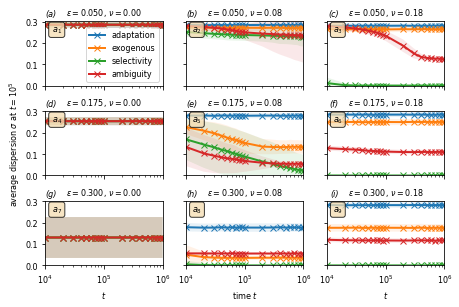

In [4]:
folder = "../../data/ms2_noise-in-OD/SA/"

fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16/2.54, 10.5/2.54))
for noise_type in ["adaptation", "exogenous", "selection", "ambiguity"]:
    data = xr.open_dataset(f"{folder}model-{noise_type}Noise_SARes_SAt_uniformInitial_eps_seeds0-1000.ncdf", engine="netcdf4")
    mean = data.sel({"mu":0.5}).x.std(dim="id").mean(dim="seed")
    std = data.sel({"mu":0.5}).x.std(dim="id").std(dim="seed")
    #min = data.sel({"mu":0.5}).x.std(dim="id").min(dim="seed")
    #max = data.sel({"mu":0.5}).x.std(dim="id").max(dim="seed")
    for nnoise, nu, in enumerate(data.nu.values):
        for nbias, bc in enumerate(data.bc.values):
            ax = axs[nbias, nnoise]
            m = mean.sel({"nu":nu, "bc":bc}).values 
            s=  std.sel({"nu":nu, "bc":bc}).values
            #mi = min.sel({"nu":nu, "bc":bc}).values
            #ma = max.sel({"nu":nu, "bc":bc}).values
            l = ax.fill_between(mean.t, m-s, m+s, alpha=0.1)
            #l, = ax.plot(mean.t, mi, alpha=0.8, lw=0.5)            
            #l, = ax.plot(mean.t, ma, alpha=0.8, lw=0.5, color=l.get_color())  
            if noise_type=="selection":
                noise_type="selectivity"          
            ax.plot(mean.t, m, label=f"{noise_type}", marker="x", color=l.get_facecolor()[:2], alpha=1, lw=2)
            ax.set_title(fr"$\epsilon=${bc:.3f}, $\nu=${nu:.2f}", fontsize=smallfs)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.set_xscale("log")
            ax.set_xlim(1e4, 1e6)
            ax.set_ylim(0,)
axs[1,0].set_ylabel(r"average dispersion $\sigma$ at $t=10^5$", fontsize=smallfs)
    
axs[2,1].set_xlabel(r"time $t$", fontsize=smallfs)
axs[2,0].set_xlabel(r"$t$", fontsize=smallfs)
axs[2,2].set_xlabel(r"$t$", fontsize=smallfs)

axs[0,0].legend(loc="lower right", fontsize=smallfs)

letter =[r"$\,a_1$", r"$a_2$", r"$a_3$", r"$\,a_4$", r"$a_5$", r"$a_6$", r"$\,a_7$", r"$a_8$", r"$a_9$"]  
for n, ax in enumerate(axs.flatten()):
    ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k", bbox =dict(boxstyle='round', facecolor='wheat', alpha=0.77))

letters = string.ascii_lowercase[:14]
for l, ax in zip(letters, axs.flatten()):
    ax.text(0.1, 1.05, f"({l})", style="italic", color="k", fontsize=smallfs, va="bottom", ha="right", transform=ax.transAxes)
fig.subplots_adjust(hspace=0.4, right=0.97, bottom=0.11, top=0.93, left=0.09)
plt.savefig("figs/sa-t.png", dpi=600)
plt.savefig("figs/sa-t.pdf")
